<a href="https://colab.research.google.com/github/Ojonimi81/Linear-Regression-Assignment/blob/main/Copy_of_Personal_Loan_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Background and Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

Objective

    To predict whether a liability customer will buy a personal loan or not.
    Which variables are most significant.
    Which segment of customers should be targeted more.

Project Dataset: Loan_Modelling.csv

Data Dictionary:
* ID: Customer ID
* Age: Customer’s age in completed years
* Experience: #years of professional experience
* Income: Annual income of the customer (in thousand dollars)
* ZIP Code: Home Address ZIP code.
* Family: the Family size of the customer
* CCAvg: Average spending on credit cards per month (in thousand dollars)
* Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* Mortgage: Value of house mortgage if any. (in thousand dollars)
* Personal_Loan: Did this customer accept the personal loan offered in the last campaign?
* Securities_Account: Does the customer have securities account with the bank?
* CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?
* Online: Do customers use internet banking facilities?
* CreditCard: Does the customer use a credit card issued by any other Bank (excluding All life Bank)?

In [12]:
from google.colab import drive

drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [14]:
data = pd.read_csv("/content/drive/MyDrive/Loan_Modelling.csv")

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import libraries

In [17]:
# Display the columns and some rows of the data frame

data

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [18]:
# Check the data types of the features in the data frame

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [19]:
# Check the first five rows in the data frame

data.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [20]:
# Check the number of columns and rows the data set

data.shape

(5000, 14)

# observation

- There are 5000 rows and 14 columns

In [21]:
# Check for missing values

data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

In [22]:
# checking for duplicate values
data.duplicated().sum()

0

In [23]:
# statistical summary

data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


# visualising the data

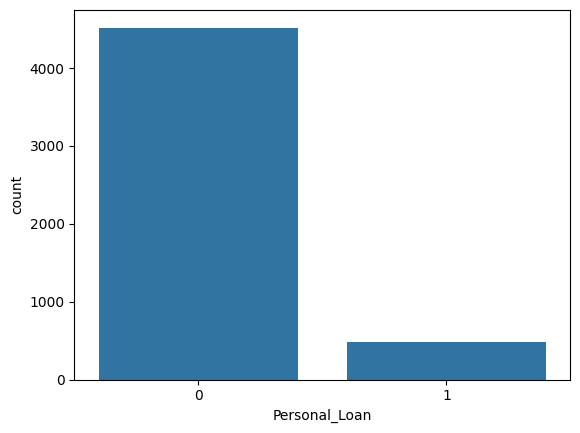

In [24]:
sns.countplot(data = data, x = "Personal_Loan");

# Observation

the data is highly inbalanced as shown from the above. This implies that fewer customers took loan

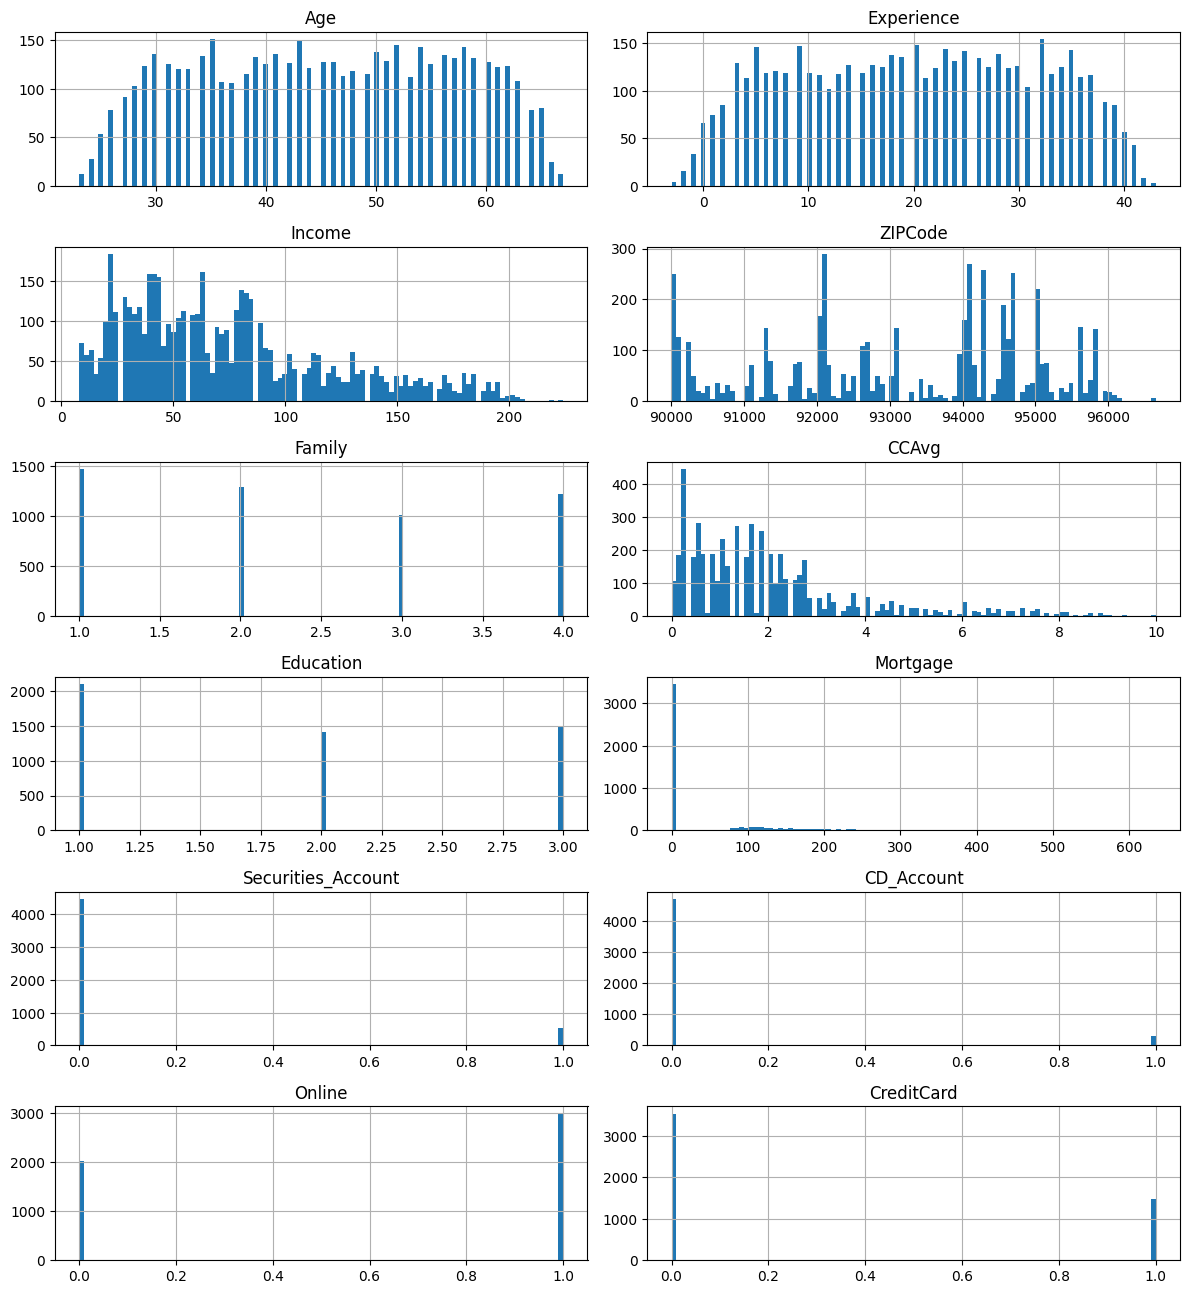

In [25]:
# Drop the "Personal_Loan" and "ID" columns
cols = data.drop(["Personal_Loan", "ID"], axis=1)

# Filter only numeric columns
numeric_cols = cols.select_dtypes(include=["int64", "float64"])

# Create histograms
numeric_cols.hist(stacked=False, bins=100, figsize=(12, 30), layout=(14, 2))
plt.tight_layout()
plt.show()

# Observations

- The Age, Zipcode and Experience are normally distributed.
- Income and CCAvg are right skewed

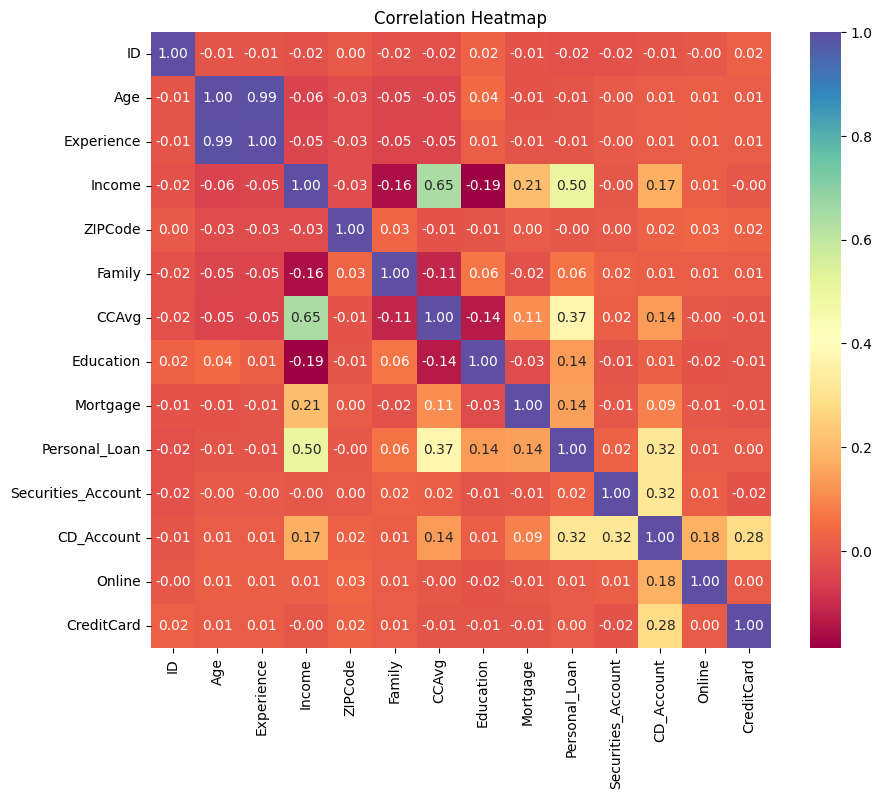

In [26]:
# calculate the correlation matrix

corr_matrix = data.corr()

plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(corr_matrix, annot=True, cmap="Spectral", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Observations

- There exist correlation between the target and Income.
- There is multicollinearity between CCAvg and Income and also between Age and Experience

In [27]:
# calculate the ratio of customers that took loans to those who do not
value_counts = data["Personal_Loan"].value_counts(normalize=True)
print(value_counts)

0    0.904
1    0.096
Name: Personal_Loan, dtype: float64


# Observation

It shows that it is an imbalance data problem

# Splitting the data

we will use 80% of data for training and 20% for testing

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [29]:
# Lets check split of data

X = data.drop(["Personal_Loan", "ID"], axis=1)
y = data["Personal_Loan"]

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [31]:
# check the distribution of the target in train and test data

y_train.value_counts(normalize=True)

0    0.904
1    0.096
Name: Personal_Loan, dtype: float64

In [32]:
# Normalize the data

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression

In [33]:
# import logistic regression

from sklearn.linear_model import LogisticRegression

In [34]:
# create an instance of Logistic regression
logreg = LogisticRegression()

In [35]:
# train the model

logreg.fit(X_train, y_train)

LogisticRegression()

In [36]:
# get the probabilities or class predictions

Pred_class = logreg.predict(X_test)

In [37]:
Pred_class

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [38]:
# get the probabilities
pred_proba = logreg.predict_proba(X_test)

In [39]:
pred_proba

array([[0.95416164, 0.04583836],
       [0.98322255, 0.01677745],
       [0.99301887, 0.00698113],
       ...,
       [0.94505465, 0.05494535],
       [0.99744152, 0.00255848],
       [0.99849655, 0.00150345]])

# Performance Metrics

In [40]:
from sklearn.metrics import (accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report)

In [41]:
# get accuracy
logreg.score(X_test, y_test)

0.951

In [42]:
# alternatively for accuracy

accuracy_score(y_test, Pred_class)

0.951

In [43]:
# get train accuracy
logreg.score(X_train, y_train)

0.9505

In [44]:
# to get precision and recall scores on the test data
precision_score(y_test, Pred_class)

0.873015873015873

In [45]:
recall_score(y_test, Pred_class)

0.5729166666666666

# Observations

- The precision shows that of all the customers that intend to take loans, the model correctly predicted 87%
- The recall shows that out of the total number of customers that intend to take loans in the entire data set the model correctly predicted 57%

Using function to compute performance metrics

In [46]:
def model_performance_classification(model, predictors, target, threshold=0.5):
    """
    Function to compute different metrics to check classification model performance

    Args:
        model: classifier
        predictors: independent variables
        target: dependent variable
        threshold: probability threshold for class conversion (default is 0.5)

    Returns:
        df_perf: DataFrame containing performance metrics
    """
    # Predict using the independent variables
    pred_proba = model.predict_proba(predictors)[:, 1]
    # Convert the probability to class
    pred_class = np.round(pred_proba > threshold)
    acc = accuracy_score(target, pred_class)  # Compute accuracy
    recall = recall_score(target, pred_class)  # Compute recall
    precision = precision_score(target, pred_class)  # Compute precision
    f1 = f1_score(target, pred_class)  # Compute F1 score

    # Create a DataFrame of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": [acc],
            "Recall": [recall],
            "Precision": [precision],
            "F1-score": [f1]
        })

    # Create a confusion matrix heatmap
    conf = confusion_matrix(target, pred_class)
    plt.figure(figsize=(8, 3))
    sns.heatmap(conf, annot=True, fmt="g")
    plt.xlabel("Predicted label")
    plt.ylabel("Actual label")
    plt.show()

    return df_perf


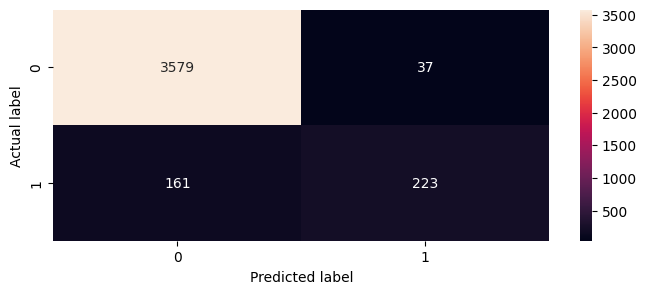

,Accuracy,Recall,Precision,F1-score
0,0.9505,0.580729,0.857692,0.692547


In [47]:
# get performances on train data
model_performance_classification(logreg, X_train, y_train)

# Observations

- Out of the 384 customers which took loan in the data set, the model correctly predicted that 223 customers took loan and wrongly predicted 161 did not take loan

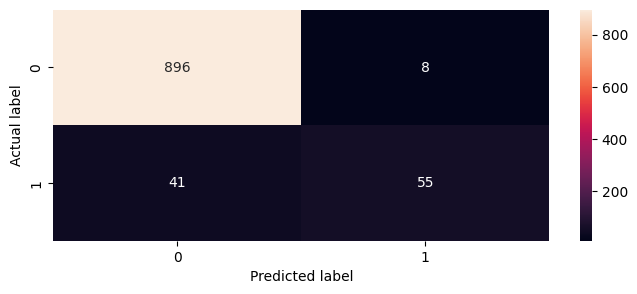

,Accuracy,Recall,Precision,F1-score
0,0.951,0.572917,0.873016,0.691824


In [48]:
# get performances on test data
model_performance_classification(logreg, X_test, y_test)

In [49]:
# We need to balance the data by applying SMOTE

In [50]:
# install implearn
# pip install imblearn

In [52]:
from imblearn.over_sampling import SMOTE, ADASYN, BorderlineSMOTE

In [53]:
# create an instance of the SMOTE
sm = SMOTE()

In [54]:
# apply smote on the training data
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

In [55]:
y_train_sm.value_counts(normalize=True)

0    0.5
1    0.5
Name: Personal_Loan, dtype: float64

In [56]:
# This implies that we now have balance data

In [ ]:
# we need to rebuild our balanced data

In [57]:
# Normalize the balance data

scaler = MinMaxScaler()
X_train_sm = scaler.fit_transform(X_train_sm)
X_test_sm = scaler.transform(X_test)

In [58]:
# re-build the model on the balance training dataset
logreg_bal = LogisticRegression()
logreg_bal.fit(X_train_sm, y_train_sm)

LogisticRegression()

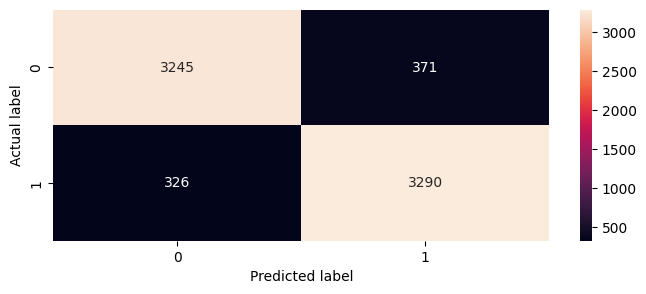

,Accuracy,Recall,Precision,F1-score
0,0.903623,0.909845,0.898662,0.904219


In [59]:
# get performances on the balance training data
model_performance_classification(logreg_bal, X_train_sm, y_train_sm)

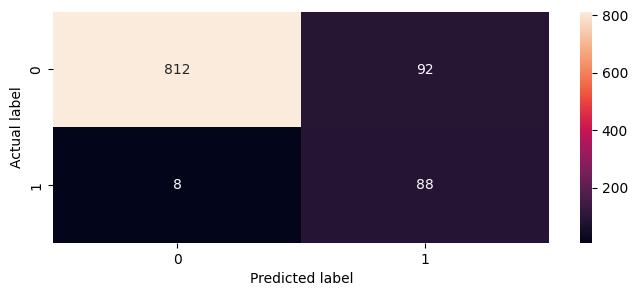

,Accuracy,Recall,Precision,F1-score
0,0.9,0.916667,0.488889,0.637681


In [62]:
# lets check the performance on the balanced test data
model_performance_classification(logreg_bal, X_test_sm, y_test)

In [63]:
# The difference between the recall in the training and testing data is not much, implying that the model is generalising well